In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A análise foi feita utilizando a base de dados de osteoporose obtida no Kaggle (https://www.kaggle.com/datasets/amitvkulkarni/lifestyle-factors-influencing-osteoporosis)

O objetivo é analisar quais são os fatores que mais influenciam para a doença

###Análise da base

Importação da base e informações sobre as colunas

In [131]:
df = pd.read_csv('/content/osteoporosis.csv')

In [132]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [133]:
df.set_index('Id', inplace=True)

In [134]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
Id,,,,,,,,,,,,,,,
104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [135]:
df.shape

(1958, 15)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 104866 to 108561
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1958 non-null   int64 
 1   Gender               1958 non-null   object
 2   Hormonal Changes     1958 non-null   object
 3   Family History       1958 non-null   object
 4   Race/Ethnicity       1958 non-null   object
 5   Body Weight          1958 non-null   object
 6   Calcium Intake       1958 non-null   object
 7   Vitamin D Intake     1958 non-null   object
 8   Physical Activity    1958 non-null   object
 9   Smoking              1958 non-null   object
 10  Alcohol Consumption  1958 non-null   object
 11  Medical Conditions   1958 non-null   object
 12  Medications          1958 non-null   object
 13  Prior Fractures      1958 non-null   object
 14  Osteoporosis         1958 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 244.8+ KB


In [137]:
df.describe() #não tem efeito uma vez que as variáveis são quase todas categóricas

,Age,Osteoporosis
count,1958.000000,1958.000000
mean,39.101124,0.500000
std,21.355424,0.500128
min,18.000000,0.000000
25%,21.000000,0.000000
50%,32.000000,0.500000
75%,53.000000,1.000000
max,90.000000,1.000000


vemos que é uma base de dados com 14 variáveis, sendo apenas duas numéricas e o restante categórica

###Criação de dummies e mudança de nomes

A primeira ideia de trabalhar com a base é criar dummies para as variáveis categóricas e alterar os nomes das colunas de forma que faça sentido para nossa análise

In [138]:
#df_teste = df
#df_teste.loc[df_teste['Hormonal Changes']=='Normal', 'Hormonal Changes'] = 0
#df_teste.loc[df_teste['Hormonal Changes']=='Postmenopausal', 'Hormonal Changes'] = 1
#df_teste.info()

#df["Hormonal Changes"] = np.where(df["Hormonal Changes"] == "Normal", 0, 1)
#df #criando df_teste para colocar hormonal changes como 0 e 1 pois se fizer dummies, ele vai gerar 1 para normal e 0 para menopausa e depois isso afetará o gráfico de pirâmide

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 104866 to 108561
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1958 non-null   int64 
 1   Gender               1958 non-null   object
 2   Hormonal Changes     1958 non-null   object
 3   Family History       1958 non-null   object
 4   Race/Ethnicity       1958 non-null   object
 5   Body Weight          1958 non-null   object
 6   Calcium Intake       1958 non-null   object
 7   Vitamin D Intake     1958 non-null   object
 8   Physical Activity    1958 non-null   object
 9   Smoking              1958 non-null   object
 10  Alcohol Consumption  1958 non-null   object
 11  Medical Conditions   1958 non-null   object
 12  Medications          1958 non-null   object
 13  Prior Fractures      1958 non-null   object
 14  Osteoporosis         1958 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 244.8+ KB


In [140]:
new_df = pd.get_dummies(df)
new_df

,Age,Osteoporosis,Gender_Female,Gender_Male,Hormonal Changes_Normal,Hormonal Changes_Postmenopausal,Family History_No,Family History_Yes,Race/Ethnicity_African American,Race/Ethnicity_Asian,...,Smoking_Yes,Alcohol Consumption_Moderate,Alcohol Consumption_None,Medical Conditions_Hyperthyroidism,Medical Conditions_None,Medical Conditions_Rheumatoid Arthritis,Medications_Corticosteroids,Medications_None,Prior Fractures_No,Prior Fractures_Yes
Id,,,,,,,,,,,,,,,,,,,,,
104866,69,1,1,0,1,0,0,1,0,1,...,1,1,0,0,0,1,1,0,0,1
101999,32,1,1,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,1
106567,89,1,1,0,0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
102316,78,1,1,0,1,0,1,0,0,0,...,1,0,1,0,0,1,1,0,1,0
101944,38,1,0,1,0,1,0,1,1,0,...,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106130,19,0,1,0,1,0,0,1,1,0,...,1,1,0,0,0,1,0,1,0,1
106463,23,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
103142,34,0,1,0,0,1,1,0,1,0,...,0,0,1,1,0,0,0,1,1,0


In [141]:
new_df.head()

,Age,Osteoporosis,Gender_Female,Gender_Male,Hormonal Changes_Normal,Hormonal Changes_Postmenopausal,Family History_No,Family History_Yes,Race/Ethnicity_African American,Race/Ethnicity_Asian,...,Smoking_Yes,Alcohol Consumption_Moderate,Alcohol Consumption_None,Medical Conditions_Hyperthyroidism,Medical Conditions_None,Medical Conditions_Rheumatoid Arthritis,Medications_Corticosteroids,Medications_None,Prior Fractures_No,Prior Fractures_Yes
Id,,,,,,,,,,,,,,,,,,,,,
104866,69,1,1,0,1,0,0,1,0,1,...,1,1,0,0,0,1,1,0,0,1
101999,32,1,1,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,1
106567,89,1,1,0,0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
102316,78,1,1,0,1,0,1,0,0,0,...,1,0,1,0,0,1,1,0,1,0
101944,38,1,0,1,0,1,0,1,1,0,...,1,0,1,0,0,1,0,1,0,1


In [142]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 104866 to 108561
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Age                                      1958 non-null   int64
 1   Osteoporosis                             1958 non-null   int64
 2   Gender_Female                            1958 non-null   uint8
 3   Gender_Male                              1958 non-null   uint8
 4   Hormonal Changes_Normal                  1958 non-null   uint8
 5   Hormonal Changes_Postmenopausal          1958 non-null   uint8
 6   Family History_No                        1958 non-null   uint8
 7   Family History_Yes                       1958 non-null   uint8
 8   Race/Ethnicity_African American          1958 non-null   uint8
 9   Race/Ethnicity_Asian                     1958 non-null   uint8
 10  Race/Ethnicity_Caucasian                 1958 non-null   uint8
 1

In [143]:
new_df.drop(['Gender_Male', 'Hormonal Changes_Normal', 'Family History_No', 'Body Weight_Normal', 'Calcium Intake_Adequate', 'Vitamin D Intake_Sufficient', 'Physical Activity_Active', 'Smoking_No', 'Alcohol Consumption_None', 'Medical Conditions_None', 'Medications_None', 'Prior Fractures_No'], axis=1, inplace=True)

In [144]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 104866 to 108561
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Age                                      1958 non-null   int64
 1   Osteoporosis                             1958 non-null   int64
 2   Gender_Female                            1958 non-null   uint8
 3   Hormonal Changes_Postmenopausal          1958 non-null   uint8
 4   Family History_Yes                       1958 non-null   uint8
 5   Race/Ethnicity_African American          1958 non-null   uint8
 6   Race/Ethnicity_Asian                     1958 non-null   uint8
 7   Race/Ethnicity_Caucasian                 1958 non-null   uint8
 8   Body Weight_Underweight                  1958 non-null   uint8
 9   Calcium Intake_Low                       1958 non-null   uint8
 10  Vitamin D Intake_Insufficient            1958 non-null   uint8
 1

In [145]:
new_df.rename(columns = {'Gender_Female':'Mulher', 'Hormonal Changes_Postmenopausal':'Menopausa', 'Family History_Yes':'Histórico Familiar', 'Race/Ethnicity_African American':'Africano', 'Race/Ethnicity_Asian':'Asiático', 'Race/Ethnicity_Caucasian':'Caucasiano', 'Body Weight_Underweight':'Peso Corporal Abaixo', 'Calcium Intake_Low':'Cálcio Baixo', 'Vitamin D Intake_Insufficient':'Insuf. Vitamina D', 'Physical Activity_Sedentary':'Sedentarismo', 'Smoking_Yes':'Fuma', 'Alcohol Consumption_Moderate':'Cons. Álcool Moderado', 'Medical Conditions_Hyperthyroidism':'Hipertireoidismo', 'Medical Conditions_Rheumatoid Arthritis':'Artrite Reumatoide', 'Medications_Corticosteroids':'Corticoides', 'Prior Fractures_Yes':'Fraturas Prévias'}, inplace = True)

In [146]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 104866 to 108561
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    1958 non-null   int64
 1   Osteoporosis           1958 non-null   int64
 2   Mulher                 1958 non-null   uint8
 3   Menopausa              1958 non-null   uint8
 4   Histórico Familiar     1958 non-null   uint8
 5   Africano               1958 non-null   uint8
 6   Asiático               1958 non-null   uint8
 7   Caucasiano             1958 non-null   uint8
 8   Peso Corporal Abaixo   1958 non-null   uint8
 9   Cálcio Baixo           1958 non-null   uint8
 10  Insuf. Vitamina D      1958 non-null   uint8
 11  Sedentarismo           1958 non-null   uint8
 12  Fuma                   1958 non-null   uint8
 13  Cons. Álcool Moderado  1958 non-null   uint8
 14  Hipertireoidismo       1958 non-null   uint8
 15  Artrite Reumatoide     1958 non

In [147]:
new_df.rename(columns={'Age': 'Idade', 'Osteoporosis':'Osteoporose'}, inplace=True)

In [148]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 104866 to 108561
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Idade                  1958 non-null   int64
 1   Osteoporose            1958 non-null   int64
 2   Mulher                 1958 non-null   uint8
 3   Menopausa              1958 non-null   uint8
 4   Histórico Familiar     1958 non-null   uint8
 5   Africano               1958 non-null   uint8
 6   Asiático               1958 non-null   uint8
 7   Caucasiano             1958 non-null   uint8
 8   Peso Corporal Abaixo   1958 non-null   uint8
 9   Cálcio Baixo           1958 non-null   uint8
 10  Insuf. Vitamina D      1958 non-null   uint8
 11  Sedentarismo           1958 non-null   uint8
 12  Fuma                   1958 non-null   uint8
 13  Cons. Álcool Moderado  1958 non-null   uint8
 14  Hipertireoidismo       1958 non-null   uint8
 15  Artrite Reumatoide     1958 non

Tratamos os dados para que a análise possa ser realizada. Cada coluna categórica vira duas colunas, por isso nos livramos de uma delas
ex: gênero: homem ou mulher vira a coluna mulher e coluna homem, sendo que usando apenas a coluna mulher já temos como saber se é homem (0) ou mulher (1)

Além disso, renomeamos as colunas para refletir a variável de cada uma e traduzimos para o português

###P-Value

Nessa seção buscamos analisar se as variáveis fornecidas, utilizando como métrica a média populacional, são estatisticamente significantes ou não

média da pop com osteoporose no mundo de 18,3%
https://josr-online.biomedcentral.com/articles/10.1186/s13018-021-02772-0

função para cálculo de t-test e p-value
https://www.geeksforgeeks.org/how-to-find-a-p-value-from-a-t-score-in-python/

https://ecampusontario.pressbooks.pub/introstats/chapter/8-7-hypothesis-tests-for-a-population-mean-with-unknown-population-standard-deviation/

In [149]:
from scipy.stats import t

def one_sample_t_test(sample, expected_mean, alpha=0.05, tail="two"):
    # Step 1: Calculate T-score
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    sample_size = len(sample)

    t_score = (sample_mean - expected_mean) / \
        (sample_std / np.sqrt(sample_size))

    # Step 2: Determine degrees of freedom
    df = sample_size - 1

    # Step 3: Identify the appropriate t-distribution
    # No need to explicitly specify degrees of freedom for one-sample t-test in scipy.stats.t

    # Step 4: Find the p-value
    if tail == "two":
        p_value = t.sf(np.abs(t_score), df) * 2  # for two-tailed test
    elif tail == "left":
        p_value = t.sf(t_score, df)  # for left-tailed test
    elif tail == "right":
        p_value = t.sf(-t_score, df)  # for right-tailed test
    else:
        raise ValueError(
            "Invalid tail argument. Use 'two', 'left', or 'right'.")

    # Step 5: Interpret the p-value
    print("P-value:", p_value)

    if p_value < alpha:
        print(
            "Reject the null hypothesis. There is a statistically significant difference.")
    else:
        print("Fail to reject the null hypothesis. There is no statistically significant difference.")

In [150]:
sample_osteoporose = new_df[['Osteoporose']].to_numpy()

one_sample_t_test(sample_osteoporose, 0.183, alpha=0.05, tail="two") #rejeitando a hipótese nula da amostra de osteoporose ser insignificante

P-value: 8.855700567819175e-146
Reject the null hypothesis. There is a statistically significant difference.


In [151]:
df_mulheres = new_df[new_df['Mulher']==1]
df_mulheres['Mulher'].value_counts() #pegando apenas a coluna de mulheres

1    966
Name: Mulher, dtype: int64

In [152]:
sample_osteo_mulheres = df_mulheres[['Osteoporose']].to_numpy()

one_sample_t_test(sample_osteo_mulheres, 0.231, alpha=0.05, tail="two")#rejeitando a H0 da amostra de mulheres que tem osteoporose

P-value: 4.190175822162703e-53
Reject the null hypothesis. There is a statistically significant difference.


###Correlação

nessa seção vamos tentar analisar a correlação entre as variáveis e a osteoporose

In [153]:
corr = new_df.corr()
corr_osteoporose = new_df.corr()[['Osteoporose']]

<Axes: >

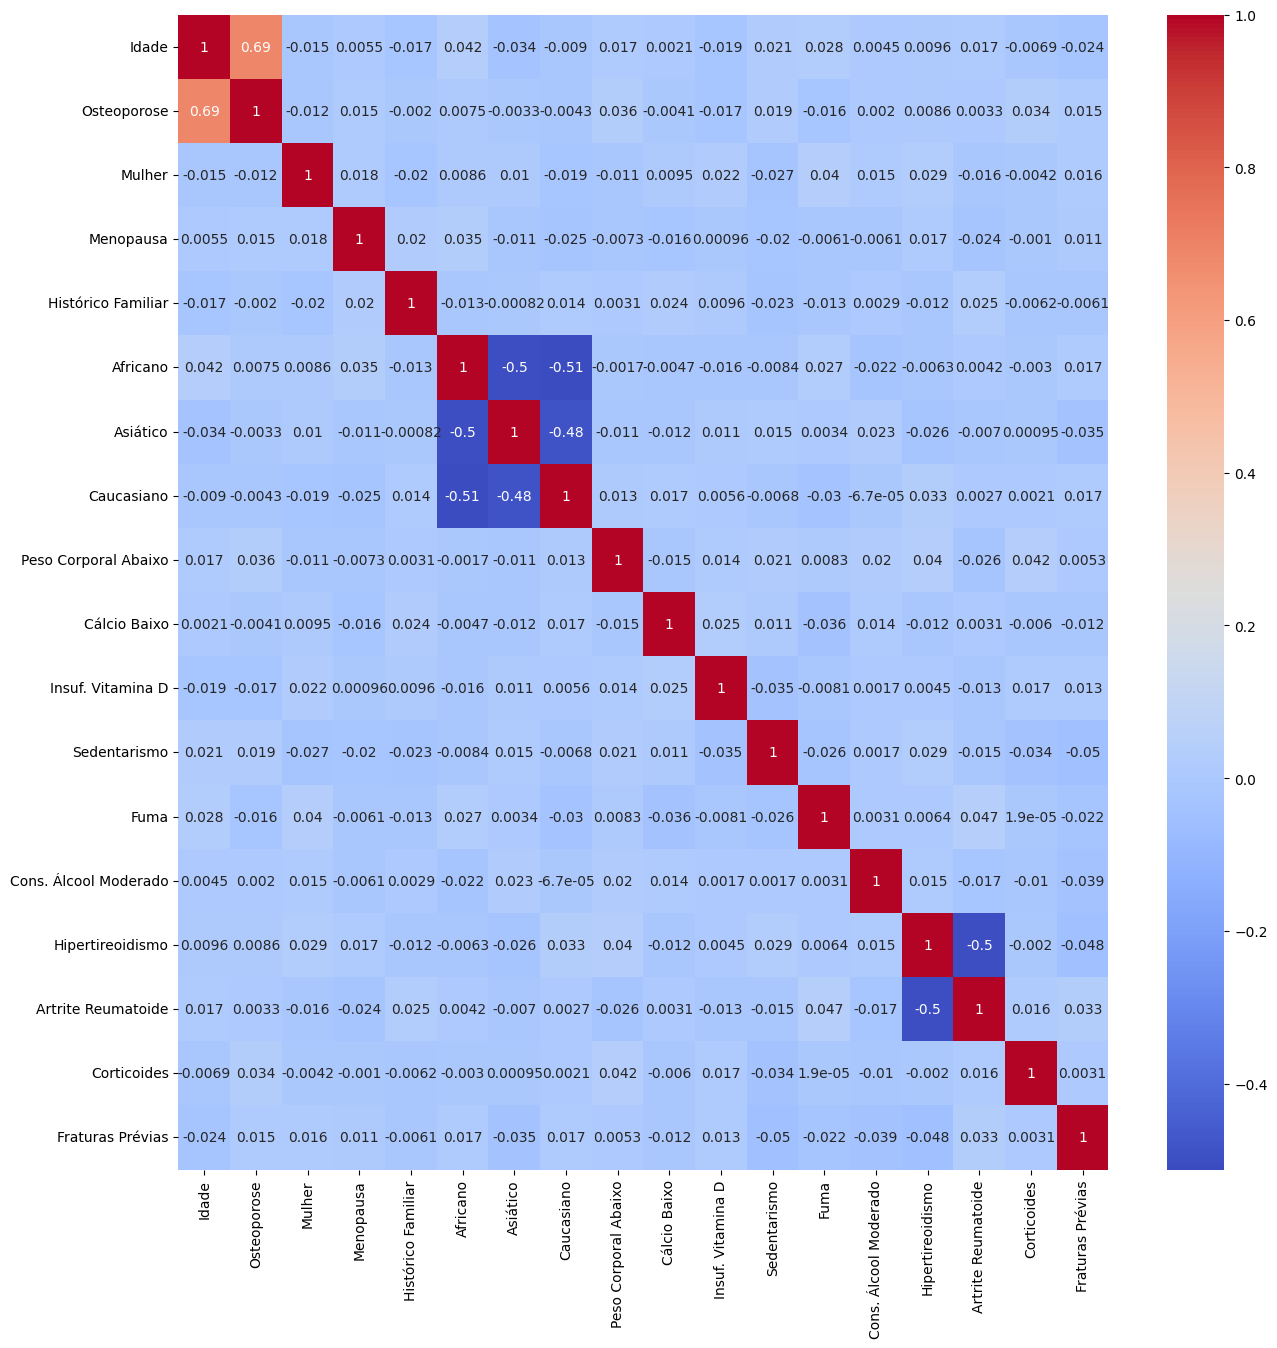

In [154]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, cmap='coolwarm', annot=True)

<Axes: >

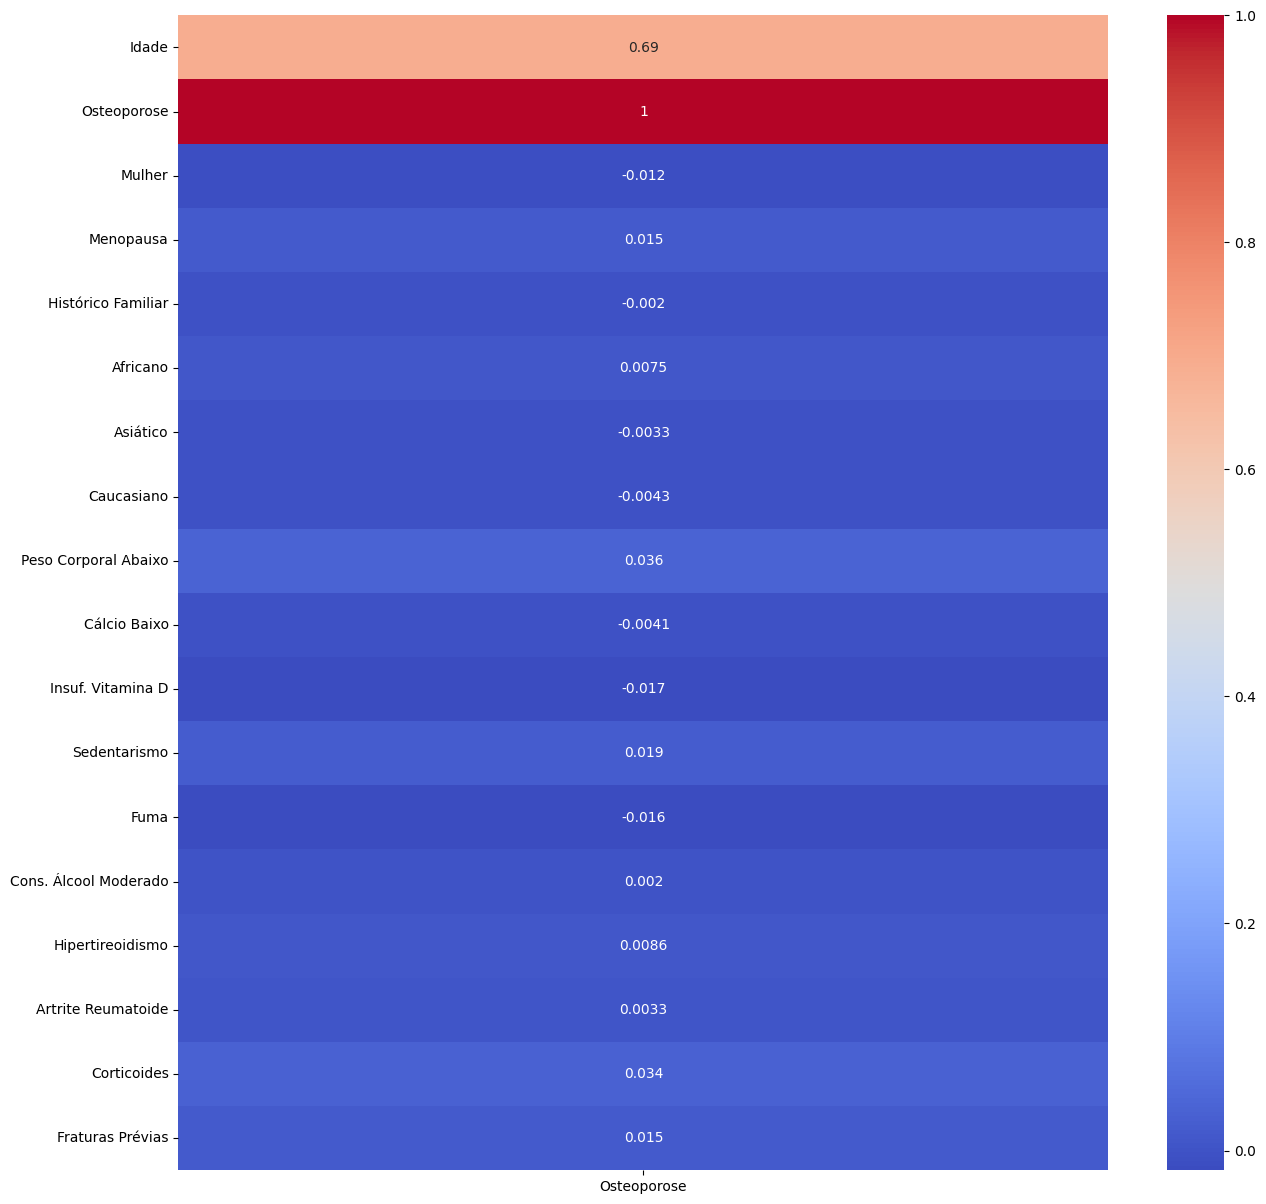

In [155]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_osteoporose, cmap='coolwarm', annot=True) #Correlação das variáveis apenas com Osteoporose

In [156]:
absoluto = corr_osteoporose
#print(absoluto)
absoluto.sort_values(by='Osteoporose')
new_table = absoluto.sort_values(by='Osteoporose')[0:17] #retirar a última linha que repete osteoporose
print(new_table)

                       Osteoporose
Insuf. Vitamina D        -0.017374
Fuma                     -0.016343
Mulher                   -0.012258
Caucasiano               -0.004345
Cálcio Baixo             -0.004087
Asiático                 -0.003278
Histórico Familiar       -0.002043
Cons. Álcool Moderado     0.002043
Artrite Reumatoide        0.003276
Africano                  0.007506
Hipertireoidismo          0.008588
Menopausa                 0.015322
Fraturas Prévias          0.015322
Sedentarismo              0.019425
Corticoides               0.033708
Peso Corporal Abaixo      0.035794
Idade                     0.691238


In [157]:
new_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Insuf. Vitamina D to Idade
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Osteoporose  17 non-null     float64
dtypes: float64(1)
memory usage: 272.0+ bytes


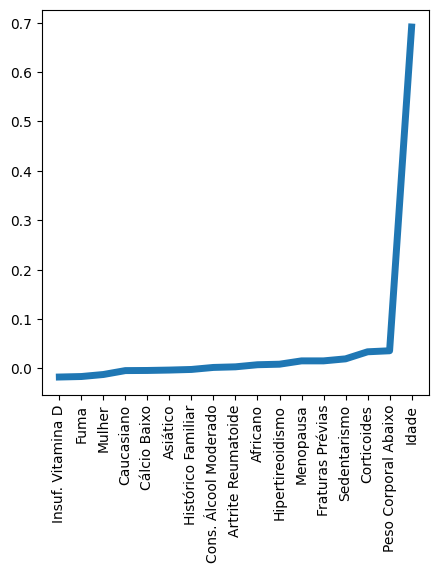

In [158]:
figure, ax1 = plt.subplots(figsize=(5,5))
plt.xticks(rotation=90)
ax1.plot(new_table.iloc[:,0], linewidth=5)

###Teste qui-quadrado

o teste de correlação realizado acima não é o mais indicado, pois a maioria das variáveis era categórica e foi transformada em dummy. Portanto, é necessário realizar um teste mais indicado para os tipos de variáveis que estamos tratando

fazendo o teste qui-quadrado
https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

In [159]:
from scipy.stats import chi2_contingency

In [160]:
tabel_chi = pd.crosstab(df['Gender'], df['Osteoporosis'])
tabel_chi

Osteoporosis,0,1
Gender,,
Female,489,477
Male,490,502


In [161]:
stat, p, dof, expected = chi2_contingency(tabel_chi)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')#a osteoporose não é afetada pelo gênero

p value is 0.619029042975477
Independent (H0 holds true)


In [162]:
df_idade = df[df['Age']>50]
tabel_chi2 = pd.crosstab(df_idade['Age'], df_idade['Osteoporosis'])

stat, p, dof, expected = chi2_contingency(tabel_chi2)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)') #a osteoporose não é afetada pela idade acima dos 50 anos

p value is 1.0
Independent (H0 holds true)


In [163]:
df_idade['Osteoporosis'].value_counts() #o ressultado acima se explica, pois todos acima de 50 anos tem osteoporose

1    532
Name: Osteoporosis, dtype: int64

In [164]:
tabel_chi3 = pd.crosstab(df['Age'], df['Osteoporosis'])
tabel_chi3

stat, p, dof, expected = chi2_contingency(tabel_chi3)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)') #a idade influencia na osteoporose

p value is 2.0551711636533544e-244
Dependent (reject H0)


In [165]:
tabel_chi4 = pd.crosstab(df['Hormonal Changes'], df['Osteoporosis'])
tabel_chi4

stat, p, dof, expected = chi2_contingency(tabel_chi4)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)') #a osteoporose não é afetada pela menopausa

p value is 0.5268774620813865
Independent (H0 holds true)


<Axes: ylabel='Frequency'>

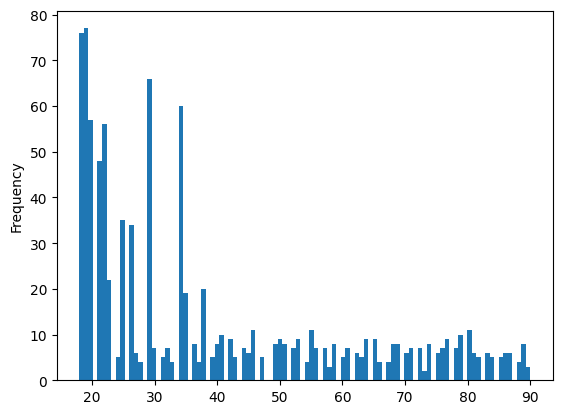

In [166]:
dist_mulheres = df_mulheres['Idade']
dist_mulheres.plot.hist(bins=100) #gráfico mostrando a distribuição de mulheres de acordo com a idade

In [167]:
#!pip install ydata-profiling

In [168]:
#from ydata_profiling import ProfileReport

In [169]:
#profile = ProfileReport(df, title="Profiling Report")
#profile.to_widgets()

In [170]:
tabel = pd.crosstab(df.iloc[:, 1], df['Osteoporosis'])
tabel

Osteoporosis,0,1
Gender,,
Female,489,477
Male,490,502


In [171]:
def chi2_multiple(DataFrame):
  for i in range(len(DataFrame.columns)):
    if i < (len(DataFrame.columns) - 1):
      tabel_chi = pd.crosstab(DataFrame.iloc[:, i], DataFrame.iloc[:, -1])
      stat, p, dof, expected = chi2_contingency(tabel_chi)
      alpha = 0.05
      print("Qui-quadrado de " + DataFrame.columns[i])
      print("p value is " + str(p))
      if p <= alpha:
        dependentes = print('Dependent (reject H0)')
      else:
        independentes = print('Independent (H0 holds true)')

chi2_multiple(df) #função para calcular todas as variáveis de acordo com a osteoporose e verificar quais são estatisticamente significativas

Qui-quadrado de Age
p value is 2.0551711636533544e-244
Dependent (reject H0)
Qui-quadrado de Gender
p value is 0.619029042975477
Independent (H0 holds true)
Qui-quadrado de Hormonal Changes
p value is 0.5268774620813865
Independent (H0 holds true)
Qui-quadrado de Family History
p value is 0.9639423339315779
Independent (H0 holds true)
Qui-quadrado de Race/Ethnicity
p value is 0.9460196454260243
Independent (H0 holds true)
Qui-quadrado de Body Weight
p value is 0.12390243689961908
Independent (H0 holds true)
Qui-quadrado de Calcium Intake
p value is 0.8921061850507267
Independent (H0 holds true)
Qui-quadrado de Vitamin D Intake
p value is 0.4693346689383344
Independent (H0 holds true)
Qui-quadrado de Physical Activity
p value is 0.415460494277902
Independent (H0 holds true)
Qui-quadrado de Smoking
p value is 0.4977843074823687
Independent (H0 holds true)
Qui-quadrado de Alcohol Consumption
p value is 0.963947598137716
Independent (H0 holds true)
Qui-quadrado de Medical Conditions
p valu

In [172]:
#abaixo vmaos verificar se existe alguma outra variável que tenha dependência com a idade e possa influenciar indiretamente na osteoporose

In [173]:
def chi2_multiple2(DataFrame):
  for i in range(len(DataFrame.columns)):
    if i > 0:
      tabel_chi = pd.crosstab(DataFrame.iloc[:, i], DataFrame.iloc[:, 0])
      stat, p, dof, expected = chi2_contingency(tabel_chi)
      alpha = 0.05
      print("Qui-quadrado de " + DataFrame.columns[i])
      print("p value is " + str(p))
      if p <= alpha:
        dependentes = print('Dependent (reject H0)')
      else:
        independentes = print('Independent (H0 holds true)')

chi2_multiple2(df) #verificando as variáveis que possuem correlação com idade

Qui-quadrado de Gender
p value is 0.6190803841560126
Independent (H0 holds true)
Qui-quadrado de Hormonal Changes
p value is 0.17203815212702267
Independent (H0 holds true)
Qui-quadrado de Family History
p value is 0.8706018973103655
Independent (H0 holds true)
Qui-quadrado de Race/Ethnicity
p value is 0.8901679341493178
Independent (H0 holds true)
Qui-quadrado de Body Weight
p value is 0.9569723712878191
Independent (H0 holds true)
Qui-quadrado de Calcium Intake
p value is 0.592069197897882
Independent (H0 holds true)
Qui-quadrado de Vitamin D Intake
p value is 0.8563612822408265
Independent (H0 holds true)
Qui-quadrado de Physical Activity
p value is 0.47152701842108546
Independent (H0 holds true)
Qui-quadrado de Smoking
p value is 0.3457492375411177
Independent (H0 holds true)
Qui-quadrado de Alcohol Consumption
p value is 0.6423208577029453
Independent (H0 holds true)
Qui-quadrado de Medical Conditions
p value is 0.7628185559899522
Independent (H0 holds true)
Qui-quadrado de Medica

In [174]:
# a única correlação de idade é com osteoporose, como visto anteriormente

a única relação que osteoporose possui é com a variável idade

###Pirâmide Etária

In [175]:
import plotly.graph_objects as gp

In [176]:
df_mul_osteo = new_df[['Idade','Mulher','Osteoporose']]
df_mul_osteo

,Idade,Mulher,Osteoporose
Id,,,
104866,69,1,1
101999,32,1,1
106567,89,1,1
102316,78,1,1
101944,38,0,1
...,...,...,...
106130,19,1,0
106463,23,1,0
103142,34,1,0


In [177]:
df_pop = pd.get_dummies(df)
df_pop['Pop'] = df_pop['Gender_Female'] + df_pop['Gender_Male']
df_pop['Pop'].value_counts() #Por ser um dummy, na hora de construir a pirâmide, a pop masculina estava somando 0 e aparecia somenta as mulheres. Por isso, uma nova coluna foi criada usando a base original para que todos os valores de Mulheres e Homens somem 1 e assim o gráfico de pirâmide reflita corretamente


1    1958
Name: Pop, dtype: int64

In [178]:
df_pop.drop(['Gender_Male', 'Hormonal Changes_Normal', 'Family History_No', 'Body Weight_Normal', 'Calcium Intake_Adequate', 'Vitamin D Intake_Sufficient', 'Physical Activity_Active', 'Smoking_No', 'Alcohol Consumption_None', 'Medical Conditions_None', 'Medications_None', 'Prior Fractures_No'], axis=1, inplace=True)

In [179]:
df_pop.rename(columns = {'Gender_Female':'Mulher', 'Hormonal Changes_Postmenopausal':'Menopausa', 'Family History_Yes':'Histórico Familiar', 'Race/Ethnicity_African American':'Africano', 'Race/Ethnicity_Asian':'Asiático', 'Race/Ethnicity_Caucasian':'Caucasiano', 'Body Weight_Underweight':'Peso Corporal Abaixo', 'Calcium Intake_Low':'Cálcio Baixo', 'Vitamin D Intake_Insufficient':'Insuf. Vitamina D', 'Physical Activity_Sedentary':'Sedentarismo', 'Smoking_Yes':'Fuma', 'Alcohol Consumption_Moderate':'Cons. Álcool Moderado', 'Medical Conditions_Hyperthyroidism':'Hipertireoidismo', 'Medical Conditions_Rheumatoid Arthritis':'Artrite Reumatoide', 'Medications_Corticosteroids':'Corticoides', 'Prior Fractures_Yes':'Fraturas Prévias'}, inplace = True)

In [180]:
df_pop.rename(columns={'Age': 'Idade', 'Osteoporosis':'Osteoporose'}, inplace=True)

In [181]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 104866 to 108561
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Idade                  1958 non-null   int64
 1   Osteoporose            1958 non-null   int64
 2   Mulher                 1958 non-null   uint8
 3   Menopausa              1958 non-null   uint8
 4   Histórico Familiar     1958 non-null   uint8
 5   Africano               1958 non-null   uint8
 6   Asiático               1958 non-null   uint8
 7   Caucasiano             1958 non-null   uint8
 8   Peso Corporal Abaixo   1958 non-null   uint8
 9   Cálcio Baixo           1958 non-null   uint8
 10  Insuf. Vitamina D      1958 non-null   uint8
 11  Sedentarismo           1958 non-null   uint8
 12  Fuma                   1958 non-null   uint8
 13  Cons. Álcool Moderado  1958 non-null   uint8
 14  Hipertireoidismo       1958 non-null   uint8
 15  Artrite Reumatoide     1958 non

In [182]:
y_age = df_pop['Idade']
x_M = df_pop['Pop']
x_O = df_pop['Osteoporose']*-1

# Creating instance of the figure
fig = gp.Figure()

# Adding Male data to the figure
fig.add_trace(gp.Bar(y= y_age, x = x_M,
                     name = 'População',
                     orientation = 'h'))

fig.add_trace(gp.Bar(y = y_age, x = x_O,
                     name = 'Osteoporose', orientation = 'h'))

fig.update_layout(title = 'Osteoporose por Idade na População Total',
                 title_font_size = 22, barmode = 'relative',
                 bargap = 0.0, bargroupgap = 0,
                 xaxis = dict(tickvals = [-30 ,-20, -10,
                                          0, 50, 100, 150],

                              ticktext = ['30', '20', '10', '0',
                                          '50', '100', '150'],
                              title = 'Valores Absolutos',
                              title_font_size = 14)
                 )

fig.show()

In [183]:
#df_mulheres #retomando o df de somente mulheres feito no p-value

In [184]:
y_age = df_mulheres['Idade']
x_M = df_mulheres['Mulher']
x_O = df_mulheres['Osteoporose']*-1

# Creating instance of the figure
fig = gp.Figure()

# Adding Male data to the figure
fig.add_trace(gp.Bar(y= y_age, x = x_M,
                     name = 'Mulher',
                     orientation = 'h'))

fig.add_trace(gp.Bar(y = y_age, x = x_O,
                     name = 'Osteoporose', orientation = 'h'))

fig.update_layout(title = 'Osteoporose por Idade em Mulheres',
                 title_font_size = 22, barmode = 'relative',
                 bargap = 0.0, bargroupgap = 0,
                 xaxis = dict(tickvals = [-30 ,-20, -10,
                                          0, 20, 40, 80],

                              ticktext = ['30', '20', '10', '0',
                                          '20', '40', '80'],
                              title = 'Valores Absolutos',
                              title_font_size = 14)
                 )

fig.show()

In [185]:
print(new_df.loc[[106817]]) #Há homens e pessoas novas com menopausa
#artigo falando sobre menopausa masculina https://www.scripps.org/news_items/4437-is-male-menopause-real

        Idade  Osteoporose  Mulher  Menopausa  Histórico Familiar  Africano  \
Id                                                                            
106817     18            0       0          1                   1         0   

        Asiático  Caucasiano  Peso Corporal Abaixo  Cálcio Baixo  \
Id                                                                 
106817         0           1                     0             1   

        Insuf. Vitamina D  Sedentarismo  Fuma  Cons. Álcool Moderado  \
Id                                                                     
106817                  0             0     1                      1   

        Hipertireoidismo  Artrite Reumatoide  Corticoides  Fraturas Prévias  
Id                                                                           
106817                 0                   1            0                 0  


In [186]:
y_age = df_pop['Idade']
x_M = df_pop['Menopausa']
x_O = df_pop['Osteoporose']*-1

# Creating instance of the figure
fig = gp.Figure()

# Adding Male data to the figure
fig.add_trace(gp.Bar(y= y_age, x = x_M,
                     name = 'Menopausa',
                     orientation = 'h'))

fig.add_trace(gp.Bar(y = y_age, x = x_O,
                     name = 'Osteoporose', orientation = 'h'))

fig.update_layout(title = 'Osteoporose por Idade em Pessoas com Menopausa',
                 title_font_size = 22, barmode = 'relative',
                 bargap = 0.0, bargroupgap = 0,
                 xaxis = dict(tickvals = [-30 ,-20, -10,
                                          0, 20, 40, 60],

                              ticktext = ['30', '20', '10', '0',
                                          '20', '40', '60'],
                              title = 'Valores Absolutos',
                              title_font_size = 14)
                 )

fig.show()

In [187]:
y_age = df_pop['Idade']
x_M = df_pop['Mulher']
x_O = df_pop['Menopausa']*-1

# Creating instance of the figure
fig = gp.Figure()

# Adding Male data to the figure
fig.add_trace(gp.Bar(y= y_age, x = x_M,
                     name = 'Mulher',
                     orientation = 'h'))

fig.add_trace(gp.Bar(y = y_age, x = x_O,
                     name = 'Osteoporose', orientation = 'h'))

fig.update_layout(title = 'Osteoporose por Idade em Menopausa',
                 title_font_size = 22, barmode = 'relative',
                 bargap = 0.0, bargroupgap = 0,
                 xaxis = dict(tickvals = [-30 ,-20, -10,
                                          0, 20, 40, 60],

                              ticktext = ['30', '20', '10', '0',
                                          '20', '40', '60'],
                              title = 'Valores Absolutos',
                              title_font_size = 14)
                 )

fig.show()

mostramos acima a relação entre idade e osteoporose. Quanto maior a idade, maior a proporção de pessoas com osteoporose naquela idade, independentemente do gênero

###Estratificação

In [188]:
#nova função calculando igual a função de chi2_multiple anterior, mas contando a quantidade de outputs dependentes e independentes
#para facilitar a visualização e contagem
depend_list = []
independ_list = []
def chi2_multiple_count(DataFrame):
  depend_list.clear()
  independ_list.clear()
  for i in range(len(DataFrame.columns)):
    if i < (len(DataFrame.columns) - 1):
      tabel_chi = pd.crosstab(DataFrame.iloc[:, i], DataFrame.iloc[:, -1])
      stat, p, dof, expected = chi2_contingency(tabel_chi)
      alpha = 0.05
      print("Qui-quadrado de " + DataFrame.columns[i])
      print("p value is " + str(p))
      if p <= alpha:
        dependentes = print('Dependent (reject H0)')
        depend_list.append(1)
      else:
        independentes = print('Independent (H0 holds true)')
        independ_list.append(1)
  print("Número de variáveis dependentes é " + str(len(depend_list)))
  print("Número de variáveis independentes é " + str(len(independ_list)))

In [189]:
chi2_multiple_count(df)

Qui-quadrado de Age
p value is 2.0551711636533544e-244
Dependent (reject H0)
Qui-quadrado de Gender
p value is 0.619029042975477
Independent (H0 holds true)
Qui-quadrado de Hormonal Changes
p value is 0.5268774620813865
Independent (H0 holds true)
Qui-quadrado de Family History
p value is 0.9639423339315779
Independent (H0 holds true)
Qui-quadrado de Race/Ethnicity
p value is 0.9460196454260243
Independent (H0 holds true)
Qui-quadrado de Body Weight
p value is 0.12390243689961908
Independent (H0 holds true)
Qui-quadrado de Calcium Intake
p value is 0.8921061850507267
Independent (H0 holds true)
Qui-quadrado de Vitamin D Intake
p value is 0.4693346689383344
Independent (H0 holds true)
Qui-quadrado de Physical Activity
p value is 0.415460494277902
Independent (H0 holds true)
Qui-quadrado de Smoking
p value is 0.4977843074823687
Independent (H0 holds true)
Qui-quadrado de Alcohol Consumption
p value is 0.963947598137716
Independent (H0 holds true)
Qui-quadrado de Medical Conditions
p valu

estratificando por idade (mais novos, pois já vimos que todos acima de 50 anos possuem osteoporose), por sexo e por menopausa para avaliar as variáveis que tem maior impacto em cada um desses segmentos

In [190]:
df_novos = df[df['Age']<50]

In [191]:
df_novos['Age']

Id
101999    32
101944    38
102265    41
107447    20
103065    39
          ..
106130    19
106463    23
103142    34
105187    25
108561    26
Name: Age, Length: 1403, dtype: int64

In [192]:
chi2_multiple_count(df_novos) #correlação com pessoas abaixo dos 50 anos

Qui-quadrado de Age
p value is 4.086655529880735e-135
Dependent (reject H0)
Qui-quadrado de Gender
p value is 0.6225299068395971
Independent (H0 holds true)
Qui-quadrado de Hormonal Changes
p value is 0.4188056043663443
Independent (H0 holds true)
Qui-quadrado de Family History
p value is 0.6870701021749086
Independent (H0 holds true)
Qui-quadrado de Race/Ethnicity
p value is 0.4361271041611082
Independent (H0 holds true)
Qui-quadrado de Body Weight
p value is 0.05884162261750652
Independent (H0 holds true)
Qui-quadrado de Calcium Intake
p value is 0.8990311851134946
Independent (H0 holds true)
Qui-quadrado de Vitamin D Intake
p value is 0.6827976222532807
Independent (H0 holds true)
Qui-quadrado de Physical Activity
p value is 0.9304111013252274
Independent (H0 holds true)
Qui-quadrado de Smoking
p value is 0.13549990621309463
Independent (H0 holds true)
Qui-quadrado de Alcohol Consumption
p value is 1.0
Independent (H0 holds true)
Qui-quadrado de Medical Conditions
p value is 0.89419

In [193]:
df_mais_novos = df[df['Age']<25] #correlação com pessoas muito novas abaixo dos 25 anos

In [194]:
chi2_multiple_count(df_mais_novos)

Qui-quadrado de Age
p value is 5.425599993785052e-13
Dependent (reject H0)
Qui-quadrado de Gender
p value is 1.0
Independent (H0 holds true)
Qui-quadrado de Hormonal Changes
p value is 0.31590838705628516
Independent (H0 holds true)
Qui-quadrado de Family History
p value is 0.6637834990049802
Independent (H0 holds true)
Qui-quadrado de Race/Ethnicity
p value is 0.05166793560905946
Independent (H0 holds true)
Qui-quadrado de Body Weight
p value is 0.47525625526329507
Independent (H0 holds true)
Qui-quadrado de Calcium Intake
p value is 0.8935494937669275
Independent (H0 holds true)
Qui-quadrado de Vitamin D Intake
p value is 1.0
Independent (H0 holds true)
Qui-quadrado de Physical Activity
p value is 0.3676640068836363
Independent (H0 holds true)
Qui-quadrado de Smoking
p value is 0.28712228771014825
Independent (H0 holds true)
Qui-quadrado de Alcohol Consumption
p value is 0.8506760001365485
Independent (H0 holds true)
Qui-quadrado de Medical Conditions
p value is 0.7497536446790956
In

In [195]:
df_female = df[df['Gender']=='Female']
df_male = df[df['Gender']=='Male']
print(df_female['Gender'].value_counts())
print(df_male['Gender'].value_counts())

Female    966
Name: Gender, dtype: int64
Male    992
Name: Gender, dtype: int64


In [196]:
chi2_multiple_count(df_female) #correlação de mulheres e osteoporose

Qui-quadrado de Age
p value is 1.701697524872459e-102
Dependent (reject H0)
Qui-quadrado de Gender
p value is 1.0
Independent (H0 holds true)
Qui-quadrado de Hormonal Changes
p value is 0.8017718474147185
Independent (H0 holds true)
Qui-quadrado de Family History
p value is 0.8349071555055524
Independent (H0 holds true)
Qui-quadrado de Race/Ethnicity
p value is 0.6088001879807485
Independent (H0 holds true)
Qui-quadrado de Body Weight
p value is 0.6686028811914073
Independent (H0 holds true)
Qui-quadrado de Calcium Intake
p value is 0.7371968566914838
Independent (H0 holds true)
Qui-quadrado de Vitamin D Intake
p value is 0.8437732061983334
Independent (H0 holds true)
Qui-quadrado de Physical Activity
p value is 0.23463678429993284
Independent (H0 holds true)
Qui-quadrado de Smoking
p value is 1.0
Independent (H0 holds true)
Qui-quadrado de Alcohol Consumption
p value is 0.8450298860878431
Independent (H0 holds true)
Qui-quadrado de Medical Conditions
p value is 0.8153449812632311
Inde

entre as mulheres parece haver duas relações que influenciam na osteoporose: a idade, conforme visto em análises anteriores, e o uso de corticóides como medicação

In [197]:
df_female['Medications'].value_counts()

None               488
Corticosteroids    478
Name: Medications, dtype: int64

In [198]:
chi2_multiple_count(df_male) #correlação de homens e osteoporose

Qui-quadrado de Age
p value is 3.2037273695497317e-105
Dependent (reject H0)
Qui-quadrado de Gender
p value is 1.0
Independent (H0 holds true)
Qui-quadrado de Hormonal Changes
p value is 0.2245498374978056
Independent (H0 holds true)
Qui-quadrado de Family History
p value is 0.949364608735901
Independent (H0 holds true)
Qui-quadrado de Race/Ethnicity
p value is 0.6033286633903752
Independent (H0 holds true)
Qui-quadrado de Body Weight
p value is 0.0955259835005174
Independent (H0 holds true)
Qui-quadrado de Calcium Intake
p value is 0.5634240280825031
Independent (H0 holds true)
Qui-quadrado de Vitamin D Intake
p value is 0.4578354189967795
Independent (H0 holds true)
Qui-quadrado de Physical Activity
p value is 0.018466633978019682
Dependent (reject H0)
Qui-quadrado de Smoking
p value is 0.3475450290969385
Independent (H0 holds true)
Qui-quadrado de Alcohol Consumption
p value is 0.9566944135145059
Independent (H0 holds true)
Qui-quadrado de Medical Conditions
p value is 0.53243521611

entre os homens parece haver duas relações que influenciam na osteoporose: a idade, conforme visto em análises anteriores, e o nível de atividade física

In [199]:
df_male['Physical Activity'].value_counts()

Active       504
Sedentary    488
Name: Physical Activity, dtype: int64

In [200]:
df['Hormonal Changes'].value_counts()

Normal            981
Postmenopausal    977
Name: Hormonal Changes, dtype: int64

In [201]:
df_hormonal = df[df['Hormonal Changes']=='Postmenopausal']
df_normal = df[df['Hormonal Changes']=='Normal']

In [202]:
chi2_multiple_count(df_hormonal)

Qui-quadrado de Age
p value is 7.111286205792294e-108
Dependent (reject H0)
Qui-quadrado de Gender
p value is 0.2617127464498018
Independent (H0 holds true)
Qui-quadrado de Hormonal Changes
p value is 1.0
Independent (H0 holds true)
Qui-quadrado de Family History
p value is 0.23665708111010536
Independent (H0 holds true)
Qui-quadrado de Race/Ethnicity
p value is 0.7430104605683918
Independent (H0 holds true)
Qui-quadrado de Body Weight
p value is 0.5674115413261188
Independent (H0 holds true)
Qui-quadrado de Calcium Intake
p value is 0.6281084976179423
Independent (H0 holds true)
Qui-quadrado de Vitamin D Intake
p value is 0.470874867756357
Independent (H0 holds true)
Qui-quadrado de Physical Activity
p value is 0.30398398274967975
Independent (H0 holds true)
Qui-quadrado de Smoking
p value is 0.5006892626040573
Independent (H0 holds true)
Qui-quadrado de Alcohol Consumption
p value is 0.8670777699334944
Independent (H0 holds true)
Qui-quadrado de Medical Conditions
p value is 0.869275

os resultados acima demonstram que há correlação entre pessoas na menopausa e idade, o que é esperado com base nas nossas análises anteriores

In [203]:
chi2_multiple_count(df_normal)

Qui-quadrado de Age
p value is 3.382141871904846e-101
Dependent (reject H0)
Qui-quadrado de Gender
p value is 0.7366624777038308
Independent (H0 holds true)
Qui-quadrado de Hormonal Changes
p value is 1.0
Independent (H0 holds true)
Qui-quadrado de Family History
p value is 0.18375733752629006
Independent (H0 holds true)
Qui-quadrado de Race/Ethnicity
p value is 0.8561088536409801
Independent (H0 holds true)
Qui-quadrado de Body Weight
p value is 0.12211296493350383
Independent (H0 holds true)
Qui-quadrado de Calcium Intake
p value is 0.8074244570193575
Independent (H0 holds true)
Qui-quadrado de Vitamin D Intake
p value is 0.8105110926525724
Independent (H0 holds true)
Qui-quadrado de Physical Activity
p value is 0.024038634318996797
Dependent (reject H0)
Qui-quadrado de Smoking
p value is 0.0914046166177819
Independent (H0 holds true)
Qui-quadrado de Alcohol Consumption
p value is 0.9733586643292161
Independent (H0 holds true)
Qui-quadrado de Medical Conditions
p value is 0.959164180

os resultados acima demonstram que há correlação entre pessoas que não estão na menopausa com a idade, conforme esperado com base nas nossas análises anteriores, mas também há correlação entre não estar na menopausa e atividades físicas

com base no pressuposto acima, vamos avaliar se pessoas mais velhas tem correlação com um nível de atividade maior ou não. Assim, caso pessoas mais jovens pratiquem mais atividade física e pessoas mais velhas não, a relação acima entre não ter menopausa e atividades físicas estará mais associada à idade do que a praticar atividades físicas, sendo a atividade física e a não menopausa apenas consequência de pessoas mais jovens praticarem algum esporte

In [204]:
tabel_novos = pd.crosstab(df_novos['Physical Activity'], df_novos['Age'])
stat, p, dof, expected = chi2_contingency(tabel_novos)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')#a relação entre atividade física e pessoas jovens não tem relevância estatística

p value is 0.6436237794136304
Independent (H0 holds true)


In [205]:
tabel_velhos = pd.crosstab(df_idade['Physical Activity'], df_idade['Age'])
stat, p, dof, expected = chi2_contingency(tabel_velhos)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')#a relação entre atividade física e pessoas mais velhas não tem relevância estatística

p value is 0.3522719811910943
Independent (H0 holds true)


Sendo assim, pessoas que praticam atividade física tem relação estatística significativa com não estar na menopausa, contudo não há ligação entre essas variáveis e a osteoporose

###Conclusão

a conclusão que chegamos com base nos dados apresentados é de que dentre todas as variáveis da base de dados, apenas a Idade tem relação com a incidência de Osteoporose.
As demais variáveis não possuem relação direta com a osteoporose, mas possuem outras relações entre si que podem estar ligadas a outras condições. Seria necessária uma análise de outras bases de dados sobre osteoporose ou uma base com mais variáveis que pudesse indicar quais fatores ligados a idade poderia estar ligados a osteoporose mas acabam incluídos intrisecamente na idade